<a href="https://colab.research.google.com/github/themanoftalent/pyt-colab/blob/master/MultiLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt



In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [22]:
mnist=input_data.read_data_sets("/data/MNIST/",one_hot=True)

Extracting /data/MNIST/train-images-idx3-ubyte.gz
Extracting /data/MNIST/train-labels-idx1-ubyte.gz
Extracting /data/MNIST/t10k-images-idx3-ubyte.gz
Extracting /data/MNIST/t10k-labels-idx1-ubyte.gz


x <br>
y_true
w
b
logits <br>
layer1

In [0]:
x=tf.placeholder(tf.float32,[None,784])
y_true=tf.placeholder(tf.float32,[None,10])
pkeep=tf.placeholder(tf.float32)

In [0]:
layer_1=128
layer_2=64
layer_3=32
layer_out=10

In [0]:
weigh_1 =tf.Variable(tf.truncated_normal([784,layer_1],stddev=0.1))
bias_1  =tf.Variable(tf.constant(0.1, shape=[layer_1]))

In [0]:
weigh_2 =tf.Variable(tf.truncated_normal([layer_1,layer_2],stddev=0.1))
bias_2  =tf.Variable(tf.constant(0.1, shape=[layer_2]))

In [0]:
weigh_3 =tf.Variable(tf.truncated_normal([layer_2,layer_3],stddev=0.1))
bias_3  =tf.Variable(tf.constant(0.1, shape=[layer_3]))

In [0]:
weigh_4 =tf.Variable(tf.truncated_normal([layer_3,layer_out],stddev=0.1))
bias_4  =tf.Variable(tf.constant(0.1, shape=[layer_out]))

In [0]:
y1=tf.nn.relu(tf.matmul(x,weigh_1)+bias_1)
y1d=tf.nn.dropout(y1,pkeep)

y2=tf.nn.relu(tf.matmul(y1d,weigh_2)+bias_2)
y2d=tf.nn.dropout(y2,pkeep)

y3=tf.nn.relu(tf.matmul(y2d,weigh_3)+bias_3)
y3d=tf.nn.dropout(y3,pkeep)

logits=tf.matmul(y3d,weigh_4)+bias_4
y4=tf.nn.softmax(logits)

In [0]:
xent=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)

In [0]:
loss=tf.reduce_mean(xent)

In [0]:
correct_prediction=tf.equal(tf.argmax(y4,1),tf.argmax(y_true,1))

In [0]:
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [0]:
optimize=tf.train.GradientDescentOptimizer(0.5).minimize(loss)
#optimize=tf.train.AdadeltaOptimizer(0.001).minimize(loss)

In [0]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
batch_size=128
loss_graf=[] #make a list to append

In [0]:
def train_step(iter):
  for i in range(iter):
    x_batch,y_batch=mnist.train.next_batch(batch_size)
    dict_train={x:x_batch, y_true:y_batch,pkeep:0.75}
    [_,train_loss]=sess.run([optimize,loss],feed_dict=dict_train)

    loss_graf.append(train_loss)


    if i% 100 ==0:
      train_acc=sess.run(accuracy,feed_dict=dict_train)
      print('Döngü sayısı:', i, 'Doğruluk Oranı:', train_acc, 'Kayıp Oranı:', train_loss)

In [0]:
def test_step():

  dict_test={x:mnist.test.images, y_true:mnist.test.labels,pkeep:1}
  acc=sess.run(accuracy, feed_dict=dict_test)
  print("\nTam Doğruluk Oranı",acc)

In [48]:
train_step(1000)
test_step()



Döngü sayısı: 0 Doğruluk Oranı: 0.953125 Kayıp Oranı: 0.28998226
Döngü sayısı: 100 Doğruluk Oranı: 0.984375 Kayıp Oranı: 0.1431301
Döngü sayısı: 200 Doğruluk Oranı: 0.953125 Kayıp Oranı: 0.15424666
Döngü sayısı: 300 Doğruluk Oranı: 0.953125 Kayıp Oranı: 0.27678353
Döngü sayısı: 400 Doğruluk Oranı: 0.9765625 Kayıp Oranı: 0.14602241
Döngü sayısı: 500 Doğruluk Oranı: 0.9765625 Kayıp Oranı: 0.16305047
Döngü sayısı: 600 Doğruluk Oranı: 0.96875 Kayıp Oranı: 0.21072066
Döngü sayısı: 700 Doğruluk Oranı: 0.9765625 Kayıp Oranı: 0.15437965
Döngü sayısı: 800 Doğruluk Oranı: 0.9765625 Kayıp Oranı: 0.21867287
Döngü sayısı: 900 Doğruluk Oranı: 0.9765625 Kayıp Oranı: 0.14647272

Tam Doğruluk Oranı 0.9706


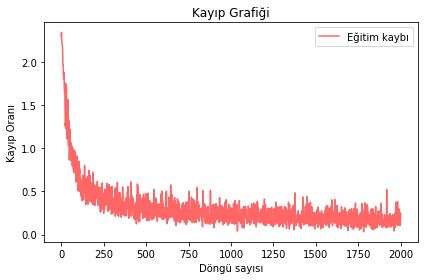

In [45]:
plt.plot(loss_graf,"r-",alpha=0.6,label="Eğitim kaybı")
plt.title("Kayıp Grafiği")
plt.xlabel("Döngü sayısı")
plt.ylabel("Kayıp Oranı")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [41]:
plt.savefig("KayıpGraf.png")

<Figure size 432x288 with 0 Axes>